# Wine Quality detection using Logistic Regression

In [75]:
# winequality-red
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from sklearn import model_selection

In [76]:
dataset = pd.read_csv("winequality-red.csv")

In [77]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [80]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [81]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [82]:
dataset.duplicated().sum()

240

In [83]:
dataset.shape

(1599, 12)

In [84]:
dataset=dataset.drop_duplicates()

In [85]:
dataset.duplicated().sum()

0

<AxesSubplot:>

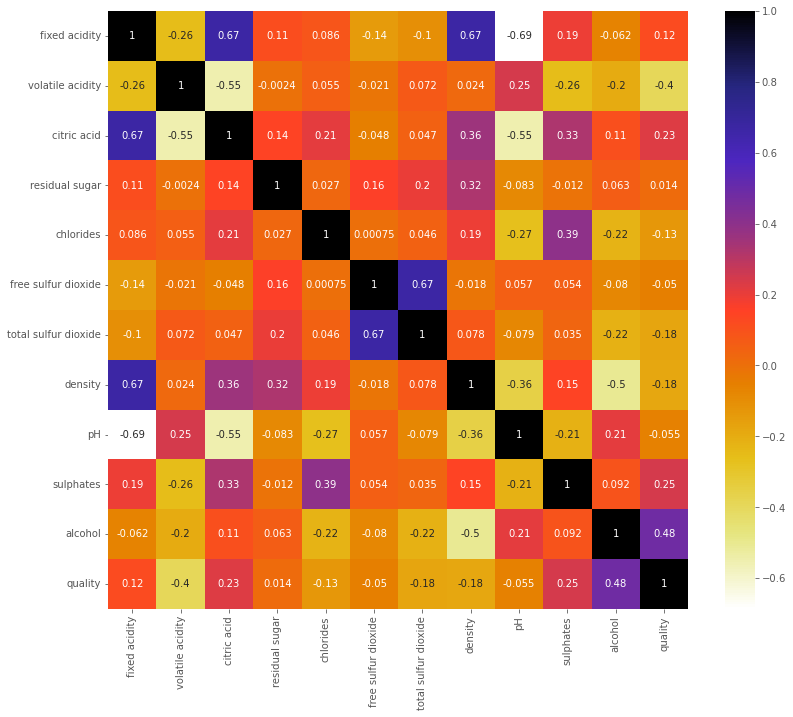

In [86]:
plt.figure(figsize=(13,11))
cor=dataset.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)

In [87]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Divide quality into two categories good and bad

In [57]:
dataset['quality'] = dataset.quality.apply(lambda x:1 if x>=6 else 0)

In [58]:
dataset['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

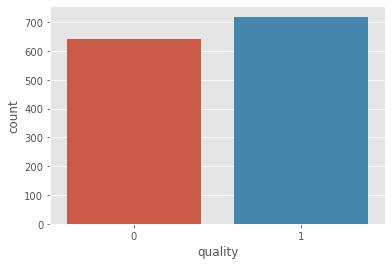

In [74]:
from matplotlib import style
style.use('ggplot')
sns.countplot(dataset['quality'])

0 shows bad quality and 1 shows good quality

# Divide features into dependent and independent column

In [59]:
y= dataset['quality'] #dependent variable is Decision
x= dataset.drop(['quality'], axis=1)

# split the data into train and test

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# apply standard scalar

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)

print (xtrain[0:10, :])

[[ 0.30109772 -0.07846036  0.3744795   0.1645692  -0.01551742  0.80290492
   2.33654773  0.82261025 -0.34453905 -0.25598406 -0.8576198 ]
 [-0.05008722 -0.51194656 -0.1373845  -0.14990997 -0.50708984 -0.56803961
  -0.56611762 -0.29808916 -0.41022385 -0.74745415 -0.20946405]
 [-0.22567969  0.24665428 -0.1885709  -0.14990997 -0.24082144  0.70498031
   1.47192401  0.09713334 -0.67296308 -0.44028534 -0.8576198 ]
 [-0.63539546 -0.02427459 -0.70043489 -0.38576934 -0.60950077  0.21535726
  -0.75139414 -0.51464943 -0.67296308  0.17405228 -0.48724509]
 [ 2.2326149  -0.72868966  1.29583469 -0.38576934  0.08689351 -0.07841657
   0.23674726  1.79713147 -1.85528958  0.05118475 -0.20946405]
 [ 0.47669019 -1.37891895  0.98871629  5.11761609  0.53750157 -1.25351188
  -1.15282658  1.2611448  -0.87001749 -0.31741782  0.43869171]
 [ 1.4717142  -0.72868966  0.73278429 -0.22852976 -0.07696397 -0.86181344
  -0.90579123  0.93089038 -1.52686555  0.11261852 -1.04280716]
 [-0.63539546  0.02991119  0.0161747   0.

# apply logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

LogisticRegression(random_state=0)

In [63]:
y_pred = classifier.predict(xtest)

# check confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[112  46]
 [ 48 134]]


# check model accuracy

In [65]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7235294117647059


In [28]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = xtest, y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
#                                stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, 
#                                stop = X_set[:, 1].max() + 1, step = 0.01))
  
# plt.contourf(X1, X2, classifier.predict(
#              np.array([X1.ravel(), X2.ravel()]).T).reshape(
#              X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
  
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
      
# plt.title('Classifier (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

In [30]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

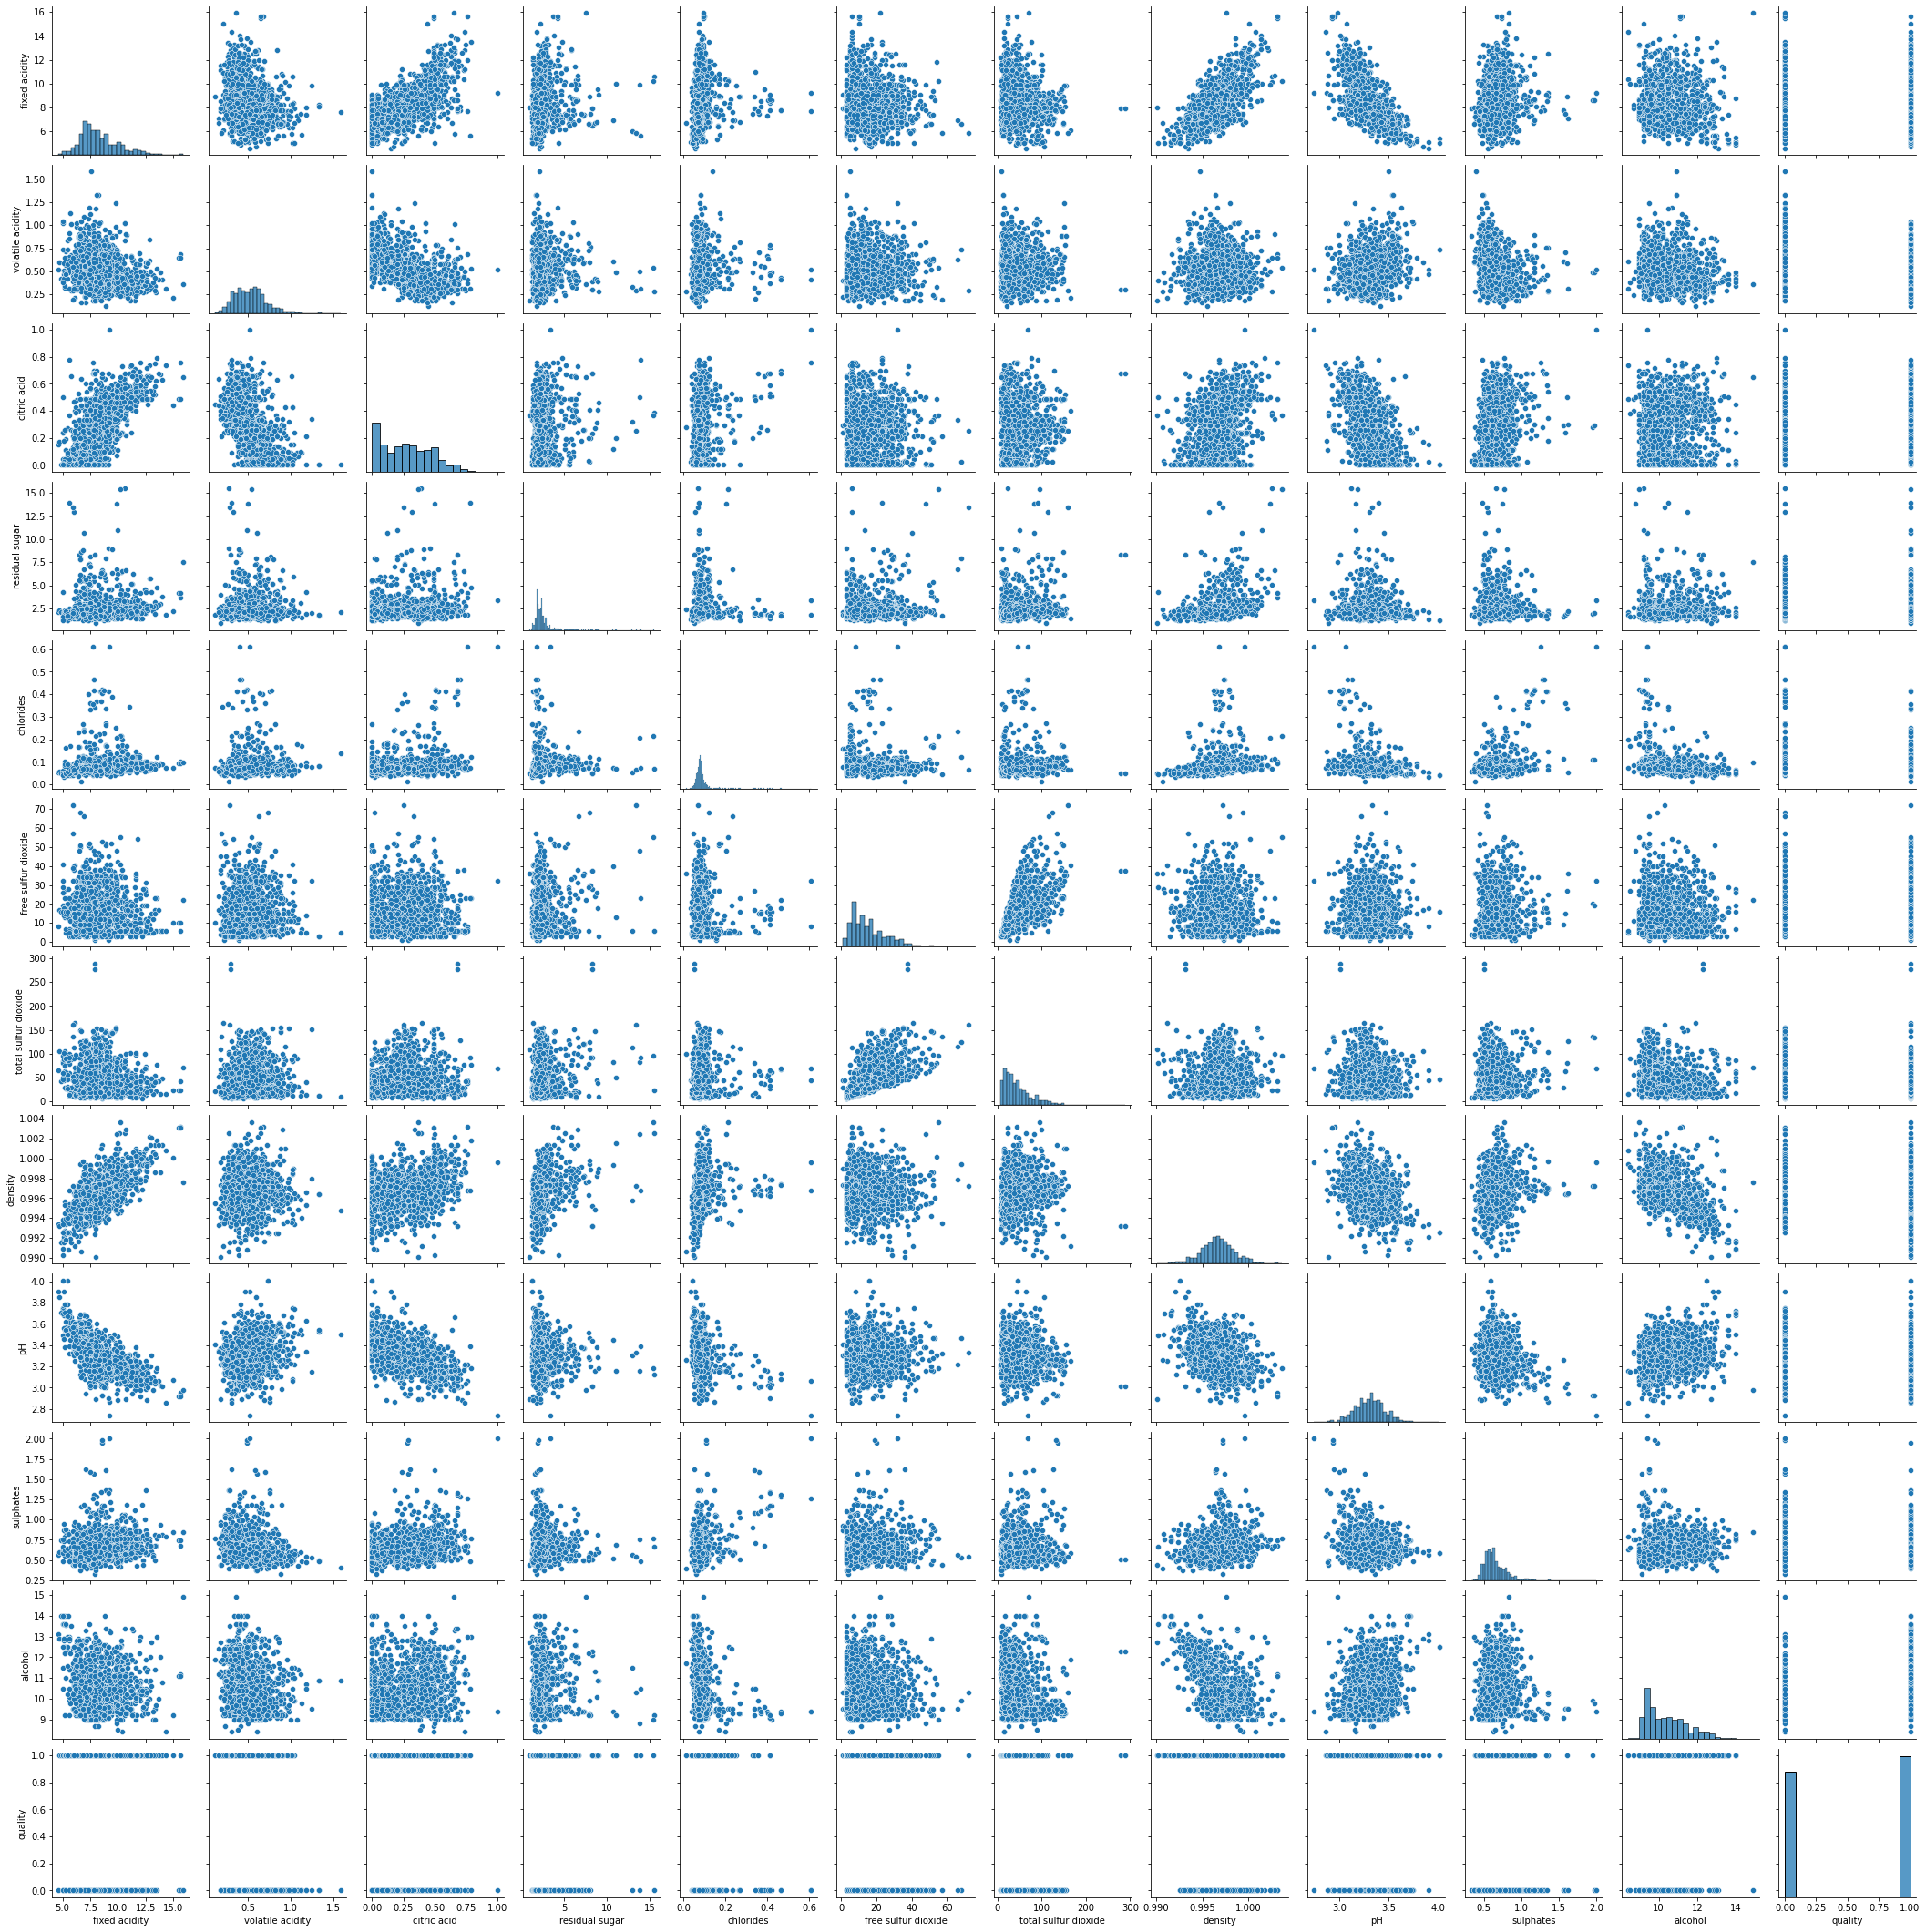

In [31]:
sns.pairplot(dataset)

In [32]:
dataset['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

# predict values and compare with actual data

In [33]:
predictions = classifier.predict(X_test)
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':y_test})

In [34]:
comparison.head(15)

,Predicted Values,Actual Values
1133,1,1
760,0,0
1173,0,1
1079,0,1
935,0,1
1460,0,1
1009,0,0
380,0,1
545,0,0
1534,1,1
